In [ ]:
import sympy as sp

# LaTeX 출력을 위한 설정
sp.init_printing(use_latex='mathjax')

# 심볼 정의
hbar, delta_p, delta_c, Omega_p, Gamma_e, Gamma_r, gamma_p, gamma_c, gamma_res, Omega_c = sp.symbols('hbar delta_p delta_c Omega_p Gamma_e Gamma_r gamma_p gamma_c gamma_res Omega_p')
rho_gg, rho_ge, rho_gr, rho_eg, rho_ee, rho_er, rho_rg, rho_re, rho_rr = sp.symbols('rho_gg rho_ge rho_gr rho_eg rho_ee rho_er rho_rg rho_re rho_rr')

# 밀도 행렬 정의
rho = sp.Matrix([[rho_gg, rho_ge, rho_gr], [rho_eg, rho_ee, rho_er], [rho_rg, rho_re, rho_rr]])

# 해밀토니안 정의
H = (hbar / 2) * sp.Matrix([[0, Omega_p, 0], [Omega_p, -2 * delta_p, Omega_p], [0, Omega_c, -2 * (delta_p + delta_c)]])


# [H, rho] 계산
commutator = H * rho - rho * H

# Lindblad 연산자 정의
L_se =  sp.Matrix([[Gamma_e * rho_ee, -0.5 * Gamma_e * rho_ge, -0.5 * Gamma_r * rho_gr],
                              [-0.5 * Gamma_e * rho_eg, -Gamma_e * rho_ee + Gamma_r * rho_rr, -0.5 * (Gamma_e + Gamma_r) * rho_er],
                               [-0.5 * Gamma_r * rho_rg, -0.5 * (Gamma_e + Gamma_r) * rho_er, -Gamma_r * rho_rr]])

#L_lw = sp.Matrix([[0, -gamma_p * rho_ge, -gamma_res * rho_gr], 
#                              [-gamma_p * rho_eg, 0, -gamma_c * rho_er],
#                             [-gamma_res * rho_rg, -gamma_c * rho_re, 0]])

# Optical Bloch Equations
drho_dt = -1j / hbar * commutator + L_se #+ L_lw

# 정상 상태 방정식을 위해 시간에 따른 변화율을 0으로 설정
steady_state_eqns = [sp.Eq(drho_dt[i, j], 0) for i in range(3) for j in range(3)]

# 밀도 행렬의 특성 추가: 추적값이 1
steady_state_eqns.append(sp.Eq(rho_gg + rho_ee + rho_rr, 1))

# 정상 상태 방정식 풀기
steady_state_solution = sp.solve(steady_state_eqns, (rho_gg, rho_ge, rho_gr, rho_eg, rho_ee, rho_er, rho_rg, rho_re, rho_rr), dict=True)

# 정상 상태 해가 있는지 확인
if steady_state_solution:
    steady_state_solution = steady_state_solution[0]

    # 해를 간단히 정리
    steady_state_solution_simplified = {k: sp.simplify(v) for k, v in steady_state_solution.items()}

    # LaTeX 출력 생성
    latex_output = sp.latex(steady_state_solution_simplified)

    # 결과 출력
    print("Optical Bloch Equations의 정상 상태 해의 LaTeX 형식:")
    print("ok")

else:
    print("정상 상태 해를 찾을 수 없습니다.")


## three level 할거임
- Quantum optics보고 해보자
### 5.7 Spectrum of resonance Fluorescence
- monochromatic field에 의해 single atom으로 인한 radiation (resonance fluorescence)를 고려해보자
- Optical Wiener-Khinchin theorem![image.png](attachment:e9a0e6e2-82b3-43d3-9636-b84583a4d74f.png)
- scattered spectrum ![image.png](attachment:3ac411ce-cbba-4b8a-b088-3e05e564989d.png)
- radiation spectrum, intensity spectral density ![image.png](attachment:9c36f7f6-7125-428c-afa4-cea61cee7b7d.png)
- rotating frame에서 spectral function ![image.png](attachment:119ce0e3-fa15-4395-abe9-e1f23a71602d.png)

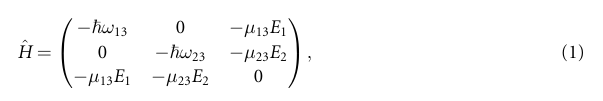
- w_13, w_23은 frequency of atomic transition, E_(1,2) = E'_(1,2) * exp(-iv_{1,2}t) + c.c.
- $\mu_{ij}$는 dipole moment of atomic transition
- 이 상황은 steady-state atomic evolution이라 rotating wave approximation을 적용해서 fast oscillating term을 지움
- H를 다시 써보면
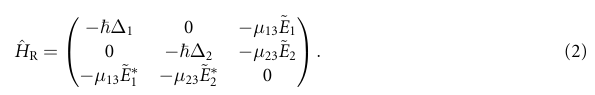

- $\Delta_i = v_i - w_{i3}$은 one-photon detuning of laser from atomic transition
- $H_R|D> =0$, 이 state는 optical field와의 interaction에서 decoupled. 이 경우는 ㅅ scheme를 볼거임
- probe와 control $\Omega_p = \mu_{13}E_1 / \hbar, \Omega_c = \mu_{23}E_2 / \hbar$
- |D> state는 |1>과 |2>의 superposition, $|D> = (\Omega_p|2>-\Omega_c|1>)/ \Omega$, 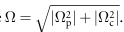
- ㅅ scheme에서 처음 두 state는 바닥 상태, dark state와 orthogonal하는 bright superposition $|B>=(\Omega*_p|1>+\Omega*_c|2>) / \Omega$는 |3>와 결합하여 interaction H($\Delta_1=\Delta_2=0$)으로 작성가능, 
- 아무튼 이런거를 설명하려면 density matrix가 필요함
- zero two-photon detuning $\delta=0$에서 steady-state dark state가 존재, 여기서 $\delta=\Delta_1-Delta_2=v_1-v_2-\omega_{12}$를 two-photon transition frequency와 state |1> 및 |2> 사이의 주파수 차이 간의 mismatch로 정의함
- 따라서 |D>는 시간에 따라 $|D_{\delta}(t)> = (\Omega_p|2>-e^{i \delta \cdot t} \Omega_c|1>)/ \Omega$와 같이 됨
- power-broadening effect에 따른 EIT 선폭도 계산할 수 있음

## 2.3. Density matrix description of the EIT
- H_R의 atomic state matrix의 evolve는 Maxwell-Bloch equation[30]으로 설명됨 [ [30] Scully M O and Zubairy M S 1997 Quantum Optics (Cambridge: Cambridge University Press)]
- 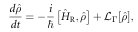
- ==[31] environment에 의한 decoherence effect는 section 3에서 설명==
- $\gamma_i$는 population decay rate of the ith state(둘 이상의 decay 채널이 있는 state의 경우, r_ij는 state j에 대한 branching ratio)이고, $\gamma_{ij}$는 off-diagonal matrix element $\rho_{ij}$의 decay rate임
- 물론 여기서는 closed system을 가정, 근데 open system에 대한 계산이 유사한 결과를 초래[32]
- ㅅ에 대한 시간 진화 방정식
- 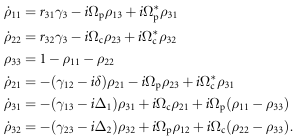
- 아무튼 초기 state나 steady-state를 고려해서 식을 정리하면 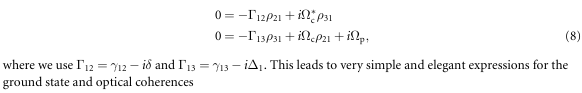
- 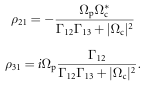
- 다음으로 probe linear susceptibility 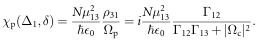
- 

In [1]:
# [A practical guide to electromagnetically induced transparency in atomic vapor]
# EIT calculation 할거임
# optical field랑 interaction한다고 할 때, interaction Hamiltonian
